### Q1 
#### Load and preprocess the dataset. Mention all the preprocessing steps in the report. You can use nltk library here, if required.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

In [2]:
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drishya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [5]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [3]:
dataset=pd.read_csv("C:/Users/Drishya/Downloads/yelp_labelled (1).txt", delimiter='\t' )

In [12]:
dataset

,Wow... Loved this place.,1
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
...,...,...
994,I think food should have flavor and texture an...,0
995,Appetite instantly gone.,0
996,Overall I was not impressed and would not go b...,0
997,"The whole experience was underwhelming, and I ...",0


In [13]:
senntiment_words=[]
for row in dataset['1']:
    if row==0:
        senntiment_words.append('Negative')
    else:
        senntiment_words.append('Positive')
dataset['senntiment_word']=senntiment_words

In [14]:
word_count=pd.value_counts(dataset['senntiment_word'].values, sort=False)
word_count

Positive    499
Negative    500
dtype: int64

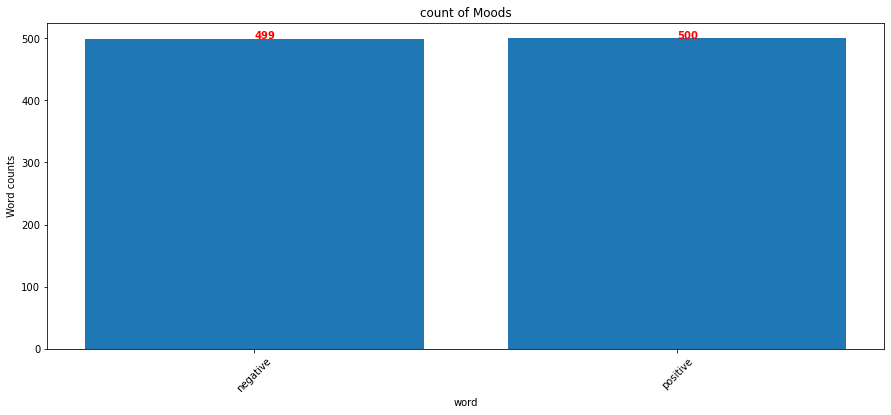

In [15]:
index=[1,2]
plt.figure(figsize=(15,6))
plt.bar(index, word_count, color='c')
plt.xticks(index, ['negative', 'positive'], rotation=45)
plt.xlabel("word")
plt.ylabel("Word counts")
plt.title("count of Moods")
plt.bar(index, word_count)
for a, b in zip(index, word_count):
    plt.text(a, b , str(b), color='red', fontweight='bold')
plt.show()

In [16]:
import nltk
nltk.download('wordnet')
def review_to_words(raw_review):
    review=raw_review
    review=re.sub('[^a-zA-Z]', ' ', review)
    review=review.lower()
    review=review.split()
    lem=WordNetLemmatizer()
    review=[lem.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return ''.join(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Drishya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
dataset.shape

(999, 3)

In [18]:
corpus=[]
for i in range(0, 999):
    corpus.append(review_to_words(dataset['Wow... Loved this place.'][i]))

In [19]:
dataset['new_corpus']=corpus

In [20]:
dataset.head()

,Wow... Loved this place.,1,senntiment_word,new_corpus
0,Crust is not good.,0,Negative,crustgood
1,Not tasty and the texture was just nasty.,0,Negative,tastytexturenasty
2,Stopped by during the late May bank holiday of...,1,Positive,stoppedlatemaybankholidayricksteverecommendati...
3,The selection on the menu was great and so wer...,1,Positive,selectionmenugreatprice
4,Now I am getting angry and I want my damn pho.,0,Negative,gettingangrywantdamnpho


### Create a vocabulary of unique words from the training set. Use this vocabulary to design word count feature matrices where the (d,w) entry corresponds to the number of occurrences of word w in document d. The feature matrices should be separate for the train and validation sets.

In [21]:
dataset.head()
positive=dataset[dataset['senntiment_word']==('Positive')]

In [22]:
word=' '.join(positive['new_corpus'])
split_word=" ".join([word for word in word.split()])

In [23]:
wordCloud=WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(split_word)

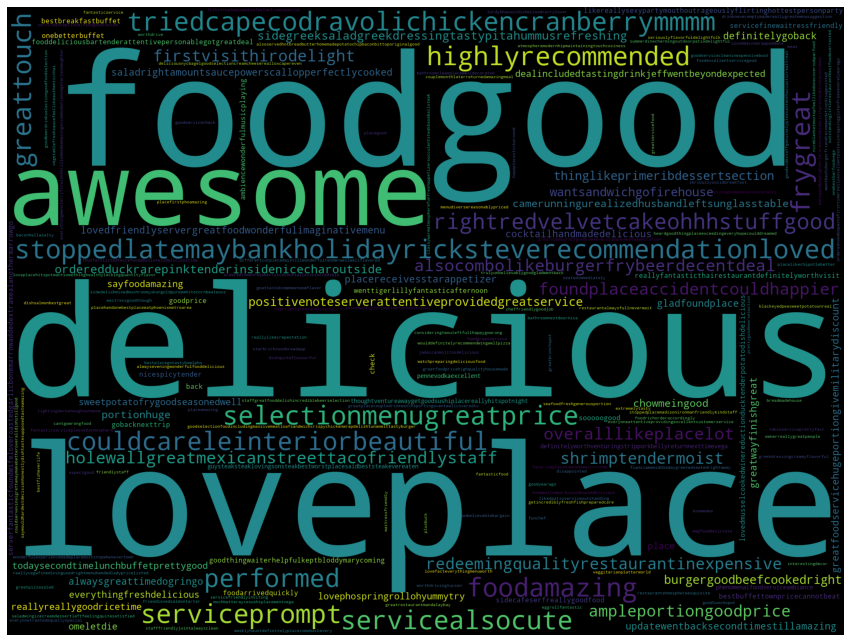

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [25]:
dataset.head()
negative=dataset[dataset['senntiment_word']==('Negative')]

In [26]:
word=' '.join(negative['new_corpus'])
split_word=" ".join([word for word in word.split()])

In [27]:
wordCloud=WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(split_word)

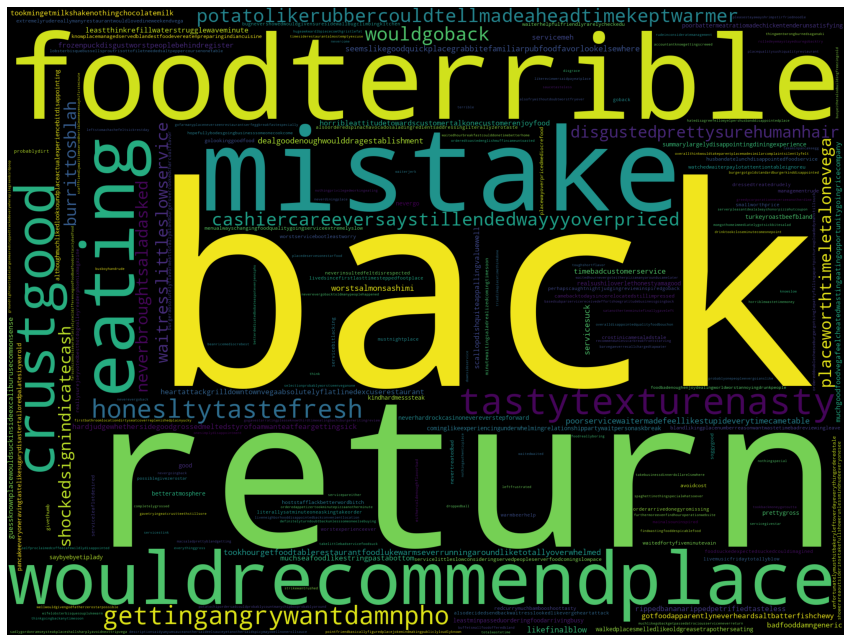

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### Implement the multinomial Naive Bayes Algorithm using the sklearn library. Apply add-1 smoothing.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x_train=cv.fit_transform(corpus).toarray()
x_test=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(x_train, y, test_size=0.4, random_state=0)

In [37]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=1)
clf.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [38]:
y_pred=clf.predict(X_test)
y_pred_train =clf.predict(X_train)

from sklearn.metrics import confusion_matrix, consensus_score
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)


Confusion Matrix
[[194   0]
 [205   1]]


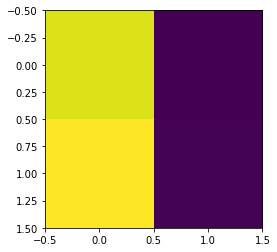

In [39]:
plt.imshow(cm)
plt.show()

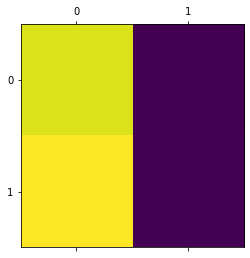

In [40]:
plt.matshow(cm)
plt.show()

### Report Accuracy, F1 score for training and test set.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print("                Accuracy of Test Dataset Using NB:")
print(classification_report(y_test, y_pred))

                Accuracy of Test Dataset Using NB:
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       194
           1       1.00      0.00      0.01       206

    accuracy                           0.49       400
   macro avg       0.74      0.50      0.33       400
weighted avg       0.75      0.49      0.32       400



In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print("                Accuracy of Training Dataset Using NB:")
print(classification_report(y_train,y_pred_train))



                Accuracy of Training Dataset Using NB:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       306
           1       1.00      0.99      1.00       293

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599

